In [1]:
import os
import pandas as pd
from scipy.stats import sem
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
results_path = '../Results/'
files = sorted(os.listdir(results_path))
files = list(map(lambda x: x.split('.')[0], files))
noise = {}
ate_mean = {}
ate_ste = {}

In [3]:
for file in files:
    names = file.split('_')
    if names[1] == 'Synthetic' and len(names) >= 3:
        model = names[0]
        n_samples = names[2]
        
        noise[model] = noise.get(model, []) + [float(n_samples)]
        
        data = pd.read_csv(results_path + file + '.csv', index_col=0)
        ate_mean[model] = ate_mean.get(model, []) + [data.loc['OUT_MEAN']['ABS_ATE']]
        ate_ste[model] = ate_ste.get(model, []) + [data.loc['OUT_STD']['ABS_ATE']]

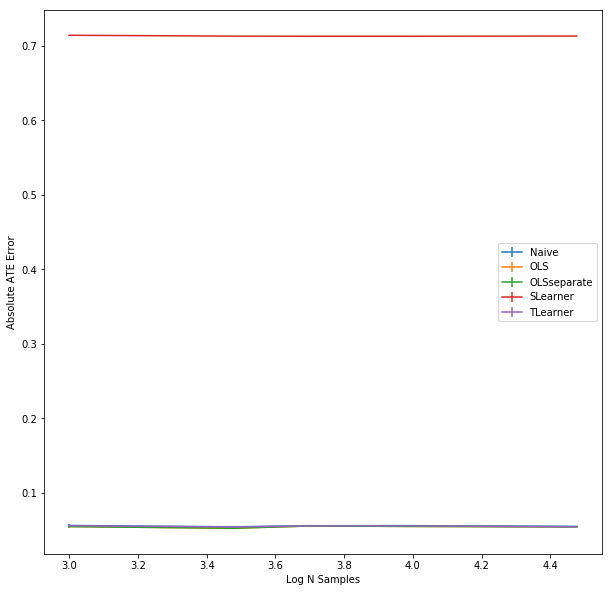

In [4]:
plt.figure(figsize=(10,10))
for model in noise.keys():

    x = np.log10(noise[model])
    y = [ye for _,ye in sorted(zip(x,ate_mean[model]))]
    err = [errs for _,errs in sorted(zip(x,ate_ste[model]))]
    x = sorted(x)
    
    plt.errorbar(x, y, yerr=err, label=model)
    plt.legend()
plt.ylabel('Absolute ATE Error')
plt.xlabel('Log N Samples')
plt.savefig('../Figures/twins_ate_error.png')
plt.show()